# Getting Started with Python



## Installing Python

There are multiple ways to get a working python installation on your computer, depending on whether you're using Windows, Mac, or Linux.

The first option is to install standard python, which you can download [here](https://www.python.org/downloads/).

The second option is to install [Anaconda](https://docs.anaconda.com/free/anaconda/install/), which comes with a bunch of extra packages and tools that can be useful for scientific computing.

Personally, I don't use Anaconda as I prefer to have more control over what I install, but both options are popular.

### Resources

- [Installing python from the windows store](https://learn.microsoft.com/en-us/windows/python/beginners#install-python)

## Installing an IDE

An IDE is basically a text editor combined with some additional tools that allow you to run and debug your code.
My IDE of choice is [VSCode](https://code.visualstudio.com/).
Two other popular IDEs are [PyCharm](https://www.jetbrains.com/pycharm/) and [Spyder](https://www.spyder-ide.org/), both of these are more specifically designed for python programming.

```{tip}
Whatever IDE you choose, make sure you learn how to use it's python debugger.
A debugger will allow you to pause the program at a specific point and then step through the code line by line and inspect the values of variables.
Debugging this way is much more efficient than using print statements.
```

```{tip}
You should also learn to use some of the keyboard shortcuts for your IDE.
Different IDEs have different shortcuts that will make your editing experience easier by allowing you to quickly do things like rename a variable everywhere it appears in your code, comment and uncomment large blocks of code, and create multiple cursors to edit multiple lines at once.

VSCode has some walkthroughs of these features that should show up the first time you open it.
```

### Resources

- [Getting Started with Python in VS Code (text-based tutorial)](https://code.visualstudio.com/docs/python/python-tutorial)
- [Setting up VSCode for Python Beginners (video tutorial)](https://www.youtube.com/watch?v=7FltByLPnrg)
- [Very extensive (but a little old) video on using VSCode for python](https://www.youtube.com/watch?v=-nh9rCzPJ20)
- [Spyder video tutorial series](https://www.youtube.com/playlist?list=PLPonohdiDqg9epClEcXoAPUiK0pN5eRoc)
- [Getting started with PyCharm video series](https://www.youtube.com/playlist?list=PLCTHcU1KoD98IeuVcqJ2rt1FNytfR_C90)

## Installing Packages

Most python packages are installed through **pip** the default python package manager.
You can install packages by running `pip install <package name>` in the terminal.
If you installed python using anaconda/conda, you can also install packages using `conda install <package name>`, but not everything you can install with pip is available through conda.
You can also `pip install` things if you use conda, but make sure you have run `conda install pip` in the relevant environment first.

### tl;dr

To install the primary packages you'll need for this course, run the following in the terminal:

```shell
pip install --upgrade pip
pip install numpy scipy jaxlib jax[cpu] matplotlib niceplots
```

### [NumPy](https://numpy.org/doc/stable/)

NumPy is **THE**  standard package for doing math in python, especially things involving vectors, matrices, and multidimensional arrays.

In [1]:
import numpy as np

# Create a random linear system (Ax=b) and solve it
N = 5
A = np.random.rand(N, N)
b = np.random.rand(N)
x = np.linalg.solve(A, b)

print(f"{A=}\n")
print(f"{b=}\n")
print(f"{x=}\n")

# Check that the solution is correct
diff = A @ x - b  # @ is the matrix multiplication operator, A @ x is equivalent to np.dot(A, x)
print(f"Linear system solution error norm = {np.linalg.norm(diff)}")

A=array([[0.47050053, 0.72288779, 0.23925365, 0.70161645, 0.59284734],
       [0.31645666, 0.11460957, 0.21845623, 0.89162463, 0.04730165],
       [0.53052793, 0.11267027, 0.7238779 , 0.43595344, 0.03279466],
       [0.10695085, 0.50631441, 0.13888287, 0.55348995, 0.12256422],
       [0.23285633, 0.42136403, 0.61655391, 0.22861142, 0.00328519]])

b=array([0.97889629, 0.09684988, 0.79827628, 0.31147303, 0.77477149])

x=array([ 0.50979579,  0.52060113,  0.84730333, -0.38534008,  0.72588911])

Linear system solution error norm = 3.188872858294072e-16


### [JAX](https://jax.readthedocs.io/en/latest/index.html)

JAX is a library that does many things useful for machine learning.
Most importantly for this course, it has a module that allows you to compute derivatives through NumPy-like code.
In theory, this means you can take code written using numpy, replace `import numpy as np` with `import jax.numpy as np`, and then differentiate through the code using jax.grad.

Support for JAX on windows is apparently "experimental", but it should still be installable through pip, see the instructions [here](https://github.com/google/jax#pip-installation-cpu).
If you run into problems, please let us know on Piazza.

In [2]:
import jax.numpy as jnp
from jax import grad


# Define a function that does some stuff with arrays
def func(x):
    return jnp.sum(jnp.exp(x) * (jnp.sin(x) + jnp.cos(2 * x))) / jnp.sum(x**2)


# Create another function that computes the gradient of the first function using JAX's AD
funcGradient = grad(func)

# Evaluate the function and it's gradient
x = jnp.linspace(0, 2 * jnp.pi, 10)
y = func(x)
dydx = funcGradient(x)

print(f"{x=}\n")
print(f"{y=}\n")
print(f"{dydx=}\n")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


x=Array([0.        , 0.69813174, 1.3962635 , 2.0943952 , 2.792527  ,
       3.4906588 , 4.1887903 , 4.8869224 , 5.585054  , 6.2831855 ],      dtype=float32)

y=Array(0.742495, dtype=float32)

dydx=Array([ 0.01439827, -0.01306541, -0.02845956,  0.07103436,  0.1409933 ,
       -0.46274623, -1.7529042 , -1.070204  ,  4.2873783 ,  7.642982  ],      dtype=float32)



### [SciPy](https://docs.scipy.org/doc/scipy/)

SciPy contains a bunch of more complex scientific computing algorithms for things like root finding, optimization, solving ODE's, and sparse linear algebra.

In [13]:
from scipy.optimize import root_scalar


# Use scipy to find the root of e^x - 1
def anotherFunc(x):
    f = np.exp(x) - 1
    print(f"{x=}, f(x) = {f}")
    return f


root = root_scalar(anotherFunc, method="bisect", bracket=[-2, 4], xtol=1e-6)

x=-2.0, f(x) = -0.8646647167633873
x=4.0, f(x) = 53.598150033144236
x=1.0, f(x) = 1.718281828459045
x=-0.5, f(x) = -0.3934693402873666
x=0.25, f(x) = 0.2840254166877414
x=-0.125, f(x) = -0.11750309741540454
x=0.0625, f(x) = 0.06449445891785932
x=-0.03125, f(x) = -0.03076676552365587
x=0.015625, f(x) = 0.015747708586685727
x=-0.0078125, f(x) = -0.007782061739756485
x=0.00390625, f(x) = 0.003913889338347465
x=-0.001953125, f(x) = -0.0019512188925244756
x=0.0009765625, f(x) = 0.0009770394924164538
x=-0.00048828125, f(x) = -0.0004881620601105974
x=0.000244140625, f(x) = 0.0002441704297477809
x=-0.0001220703125, f(x) = -0.00012206286222260498
x=6.103515625e-05, f(x) = 6.103701893311886e-05
x=-3.0517578125e-05, f(x) = -3.051711246848665e-05
x=1.52587890625e-05, f(x) = 1.525890547848796e-05
x=-7.62939453125e-06, f(x) = -7.6293654275305656e-06
x=3.814697265625e-06, f(x) = 3.814704541582614e-06
x=-1.9073486328125e-06, f(x) = -1.9073468138230965e-06
x=9.5367431640625e-07, f(x) = 9.53674771153600

### [Matplotlib](https://matplotlib.org/)

The standard plotting library for python.
It has a lot of functionality and excellent documentation.

```{tip}
If you're a Matlab user, you may be used to plotting simply by calling the `plot` function, and switching between different figures using the `figure` function.
It is possible to use a similar approach in Matplotlib, but I'd recommend that you instead use the approach used in the [matplotlib examples](https://matplotlib.org/stable/users/getting_started/) where you first create figure and axis objects and then call the plot methods of the axis.
This makes it much clearer in your code which data is being plotted on which figure.

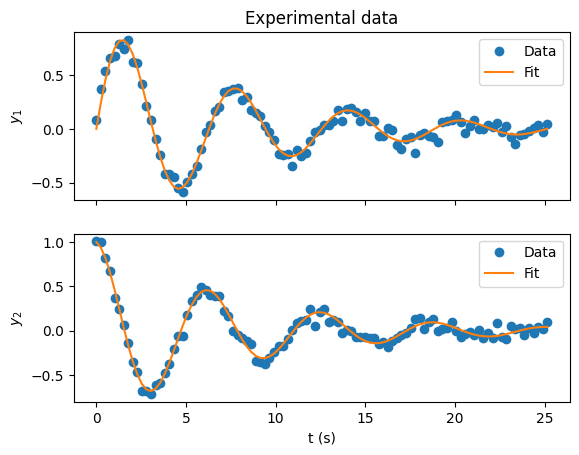

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots on top of each other
fig, axes = plt.subplots(nrows=2, sharex=True)

# Set the axis labels and tick marks
axes[0].set_ylabel("$y_1$")
axes[1].set_ylabel("$y_2$")
axes[1].set_xlabel("t (s)")
axes[0].set_title("Experimental data")

# Create some data to plot
x = np.linspace(0, 8 * np.pi, 100)

y1 = np.exp(-x / 8) * np.sin(x)
y1_experiment = y1 + np.random.normal(0, 0.05, size=y1.shape)

y2 = np.exp(-x / 8) * np.cos(x)
y2_experiment = y2 + np.random.normal(0, 0.05, size=y2.shape)

# Plot the smooth function as a line and the "experimental data" as points
axes[0].plot(x, y1_experiment, "o", label="Data")
axes[0].plot(x, y1, "-", label="Fit")

axes[1].plot(x, y2_experiment, "o", label="Data")
axes[1].plot(x, y2, "-", label="Fit")

# Loop through the subplots and add legends to each using the labels we set above
for axis in axes:
    axis.legend()

### NicePlots

NicePlots is a little package I helped write with my labmates that we use to make our Matplotlib plots look nicer.
It is not at all necessary for the course, but if you do want to use it you can pip install it just like all the other packages mentioned already.
You can also check out some example uses of it [here](https://mdolab-niceplots.readthedocs-hosted.com/en/latest/auto_examples/index.html).

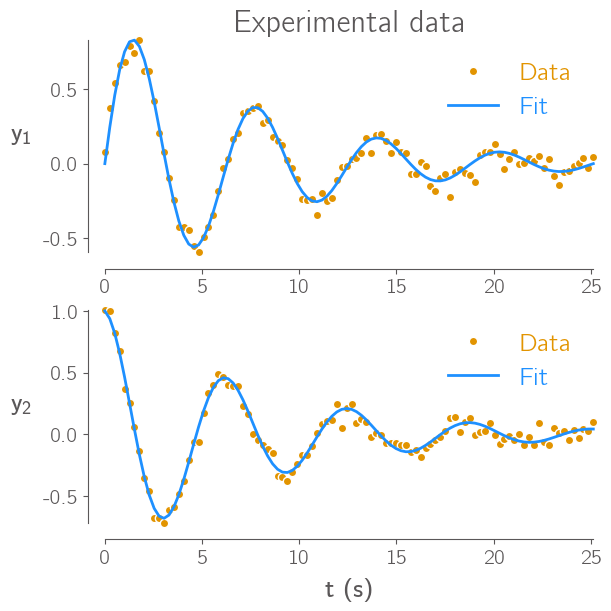

In [12]:
import niceplots

plt.style.use(niceplots.get_style())

# Repeat the same plot as above, but now with the niceplots style
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))

# Set the axis labels and tick marks
axes[0].set_ylabel("$y_1$", rotation="horizontal", ha="right")
axes[1].set_ylabel("$y_2$", rotation="horizontal", ha="right")
axes[1].set_xlabel("t (s)")
axes[0].set_title("Experimental data")

axes[0].plot(x, y1_experiment, "o", label="Data", clip_on=False)
axes[0].plot(x, y1, "-", label="Fit", clip_on=False)

axes[1].plot(x, y2_experiment, "o", label="Data", clip_on=False)
axes[1].plot(x, y2, "-", label="Fit", clip_on=False)

for axis in axes:
    axis.legend(labelcolor="linecolor")
    niceplots.adjust_spines(axis)

## Learning python

[Python for everybody](https://www.py4e.com/lessons) is a very extensive and popular course for learning python for complete beginners, it was even developed by a professor at the University of Michigan.
The most important basic concepts you'll probably need for this course are covered in sections 3-11.

[Software carpentry](https://swcarpentry.github.io/python-novice-inflammation/) also has a good introduction to python.

Below are some more resources on learning to use NumPy, especially for people used to programming in Matlab:

- [NumPy fundamentals](https://numpy.org/doc/stable/user/basics.html)
- [NumPy guide for Matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
- [Example code working with NumPy arrays](https://numpy.org/numpy-tutorials/content/tutorial-static_equilibrium.html)